In [1]:
import pandas as pd
import numpy as np
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank = pd.read_csv('dati/bank/bank.csv', sep=';')

In [3]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [4]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
logistic_model = LogisticRegression()

In [7]:
bank['housing'] = bank['housing'] == 'yes'

In [8]:
bank['housing'] = bank['housing'].astype(float)

In [9]:
logistic_model.fit(bank[['balance']], bank['housing'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
pred_probs = logistic_model.predict_proba(bank[['balance']])
pred_probs

array([[ 0.43709139,  0.56290861],
       [ 0.46268204,  0.53731796],
       [ 0.43339066,  0.56660934],
       ..., 
       [ 0.42448773,  0.57551227],
       [ 0.43158953,  0.56841047],
       [ 0.43158108,  0.56841892]])

[]

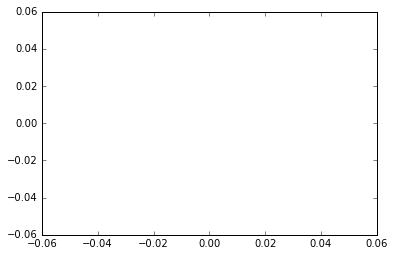

In [22]:
plt.plot(x=bank['balance'].values, y=pred_probs[:,1])

In [26]:
fitted_labels = logistic_model.predict(bank[['balance']])
fitted_labels[:10]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [31]:
bank['predicted_label'] = fitted_labels

In [33]:
sum(bank['predicted_label'])

4411.0

In [35]:
bank['predicted_label'].value_counts()

1.0    4411
0.0     110
Name: predicted_label, dtype: int64

In [38]:
bank.rename(columns={'housing':'actual_label'}, inplace = True)

In [41]:
matches = bank['predicted_label'] == bank['actual_label']
matches

0       False
1        True
2        True
3        True
4        True
5       False
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14       True
15      False
16      False
17       True
18       True
19      False
20       True
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28      False
29      False
        ...  
4491     True
4492     True
4493     True
4494     True
4495     True
4496    False
4497    False
4498     True
4499    False
4500     True
4501     True
4502     True
4503    False
4504     True
4505     True
4506    False
4507     True
4508     True
4509    False
4510     True
4511     True
4512     True
4513    False
4514     True
4515     True
4516     True
4517     True
4518    False
4519    False
4520     True
dtype: bool

In [47]:
correct_predictions = bank.loc[matches,['actual_label', 'predicted_label']]
correct_predictions.head(2)

,actual_label,predicted_label
1,1.0,1.0
2,1.0,1.0


In [49]:
accuracy = correct_predictions.shape[0]/bank.shape[0]
accuracy

0.566467595664676

In [74]:
condition = (bank['actual_label'] == 0) & (bank['predicted_label'] == 0)
bank.loc[condition,:]

,age,job,marital,education,default,balance,actual_label,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,predicted_label
64,56,admin.,married,secondary,no,16873,0.0,no,cellular,7,oct,223,1,-1,0,unknown,no,0.0
94,57,blue-collar,married,secondary,no,14093,0.0,no,cellular,11,aug,231,5,-1,0,unknown,no,0.0
194,23,student,single,secondary,no,9216,0.0,no,cellular,5,jun,471,2,-1,0,unknown,no,0.0
213,57,self-employed,married,secondary,no,11494,0.0,no,cellular,19,nov,198,1,-1,0,unknown,no,0.0
272,46,management,married,secondary,no,12186,0.0,no,unknown,20,jun,29,3,-1,0,unknown,no,0.0
276,35,housemaid,married,tertiary,no,11219,0.0,no,cellular,12,aug,699,2,79,1,failure,no,0.0
339,51,self-employed,divorced,primary,no,10924,0.0,no,cellular,6,may,106,2,-1,0,unknown,no,0.0
368,60,technician,single,primary,no,11262,0.0,no,cellular,26,aug,323,1,-1,0,unknown,yes,0.0
382,59,retired,married,tertiary,no,9676,0.0,no,telephone,27,mar,234,2,-1,0,unknown,yes,0.0
500,32,management,single,tertiary,no,12607,0.0,no,cellular,14,aug,203,5,84,1,failure,no,0.0
